# Draft - start with some linear regression model to warm up...

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
features = ['B10',
 'F12',
 'F13',
 'F14',
 'F15',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'G6_TOTAL',
 'G21',
 'minimental30',
 'MMSE28',
 'MMSE29',
 'll1cor1',
 'll2cor1',
 'll2sim1',
 'll3cor1',
 'll3sim1',
 'll4cor1',
 'll4sim1',
 'll5cor1',
 'll5sim1',
 'Sum1_5correct1st',
 'llkampilimathisis1',
 'll6cor1',
 'll6sim1',
 'll7cor1',
 'll7sim1',
 'll8cor1',
 'll9cor1',
 'll9sim1',
 'll10cor1',
 'llta1',
 'Recognrecalldiscr',
 'Encodingdefindex1',
 'figurecopy',
 'figureimmediate',
 'figuredelayed',
 'ST_D_2_immedpercentile1st',
 'jlo1stdiades',
 'jloolesmax20',
 'TMTA_tmtAtime1',
 'TMTA_tmtAerr1',
 'vfsem1stobj',
 'vfsemobjswich',
 'vfphon1stalphobj',
 'vfphaswi',
 'naming1st',
 'comphr1st',
 'repetition1st',
 'sentrepeatcorrect1',
 'sentrepeattargetr',
 'grafseqcorrect1',
 'frontaltestA1st',
 'frontaltestB1s',
 'EduC',
 'AgeC']

In [22]:
import pandas as pd
df = pd.read_csv("OUTCOME_DIAGNOSIS_processed.csv", header=0)
df.dropna(subset=['ZCO'], inplace=True)

In [23]:
X = df[features]
Y = df["ZCO"]

In [24]:
discrete =  []
continues = []

for col in X.columns:
    if (X[col].sum()).is_integer():
        discrete.append(col)
    else:
        continues.append(col)

X.fillna(X[discrete].mode().iloc[0], inplace=True)
X.fillna(X[continues].mean(), inplace=True)

,B10,F12,F13,F14,F15,G1,G2,G3,G4,G5,...,naming1st,comphr1st,repetition1st,sentrepeatcorrect1,sentrepeattargetr,grafseqcorrect1,frontaltestA1st,frontaltestB1s,EduC,AgeC
0,0.0,1.0,1.0,1.0,1.0,0.5,0.5,0.0,0.0,0.0,...,7.0,12.0,4.0,8.0,2.0,4.0,20.0,20.0,8.0,76.0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.0,9.0,2.0,8.0,2.0,5.0,19.0,18.0,6.0,83.0
2,6.0,1.0,3.0,3.0,3.0,1.0,2.0,2.0,2.0,1.0,...,1.0,12.0,6.0,14.0,0.0,5.0,20.0,20.0,7.0,87.0
4,0.0,1.0,1.0,3.0,2.0,1.0,0.5,0.5,0.0,0.5,...,4.0,10.0,0.0,2.0,4.0,3.0,20.0,18.0,3.0,78.0
5,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11.0,12.0,4.0,13.0,0.0,6.0,20.0,20.0,4.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,9.0,12.0,5.0,11.0,0.0,5.0,19.0,18.0,6.0,67.0
1644,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,...,9.0,11.0,4.0,6.0,3.0,5.5,19.0,19.0,6.0,72.0
1645,0.0,4.0,5.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,...,1.0,9.0,2.0,3.0,0.0,5.0,6.0,20.0,13.0,70.0
1646,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7.0,8.0,4.0,12.0,0.0,5.0,18.0,12.0,6.0,69.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

Training samples: 1293, Test samples: 324
Number of features: 60


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
from sklearn.linear_model import Lasso, LassoCV, LassoLarsIC
import numpy as np

During cross-validation, provide alpha values in a range of 100 numbers from 0.00005 to 1.
The best alpha balances fitting signals vs ignoring noise, found via cross-validation.

In [ ]:
lasso_cv = LassoCV(
    alphas=np.logspace(-5, 1, 100),
    cv=10,
    max_iter=10000,
    random_state=42,
    n_jobs=-1
)
sample_weight = np.where(y_train < -1, 100.0, 1.0)
lasso_cv.fit(X_train_scaled, y_train, sample_weight)

,"eps eps: float, default=1e-3Length of the path. ``eps=1e-3`` means that``alpha_min / alpha_max = 1e-3``.",0.001
,"n_alphas n_alphas: int, default=100Number of alphas along the regularization path... deprecated:: 1.7 `n_alphas` was deprecated in 1.7 and will be removed in 1.9. Use `alphas` instead.",'deprecated'
,"alphas alphas: array-like or int, default=NoneValues of alphas to test along the regularization path.If int, `alphas` values are generated automatically.If array-like, list of alpha values to use... versionchanged:: 1.7 `alphas` accepts an integer value which removes the need to pass `n_alphas`... deprecated:: 1.7 `alphas=None` was deprecated in 1.7 and will be removed in 1.9, at which point the default value will be set to 100.",array([1.0000...00000000e+01])
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: 'auto', bool or array-like of shape (n_features, n_features), default='auto'Whether to use a precomputed Gram matrix to speed upcalculations. If set to ``'auto'`` let us decide. The Grammatrix can also be passed as argument.",'auto'
,"max_iter max_iter: int, default=1000The maximum number of iterations.",10000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``.",0.0001
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"cv cv: int, cross-validation generator or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- int, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For int/None inputs, :class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",10
,"verbose verbose: bool or int, default=FalseAmount of verbosity.",False
,"n_jobs n_jobs: int, default=NoneNumber of CPUs to use during the cross validation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",-1


R-square provides a metric to define how much of the variance our model can explain towards met predictions. It's the difference between 100% and the variance that cannot be explained by the model.

In [91]:
print(f"Optimal alpha (λ): {lasso_cv.alpha_:.6f}")
print(f"Mean CV R²: {lasso_cv.mse_path_.mean(axis=1).max():.4f}")

Optimal alpha (λ): 0.010723
Mean CV R²: 1.2408


Insights on penalty scores... 
- With AIC, check whether features are worth in terms of raising R-squared. Meaning that if a feature doesn't add much value, that is adding to R-square significantly, then it'll be penalized.
- BIC follows a much stricter approach, which is implemented by penalizing on cost of complexity - suggesting higher alpha values, aggresively striving to minimize features further.

In [97]:
from sklearn.linear_model import LassoLarsIC

lasso_aic = LassoLarsIC(criterion='aic')
lasso_bic = LassoLarsIC(criterion='bic')

lasso_aic.fit(X_train_scaled, y_train)
lasso_bic.fit(X_train_scaled, y_train)

print(f"AIC optimal alpha: {lasso_aic.alpha_:.6f}")
print(f"BIC optimal alpha: {lasso_bic.alpha_:.6f}")

if lasso_aic.alpha_ < 0.003:
    print("AIC thinks you could be LESS regularized (keep more features)")
elif lasso_aic.alpha_ > 0.003:
    print("AIC thinks you should be MORE regularized (fewer features)")

AIC optimal alpha: 0.000388
BIC optimal alpha: 0.002854
AIC thinks you could be LESS regularized (keep more features)


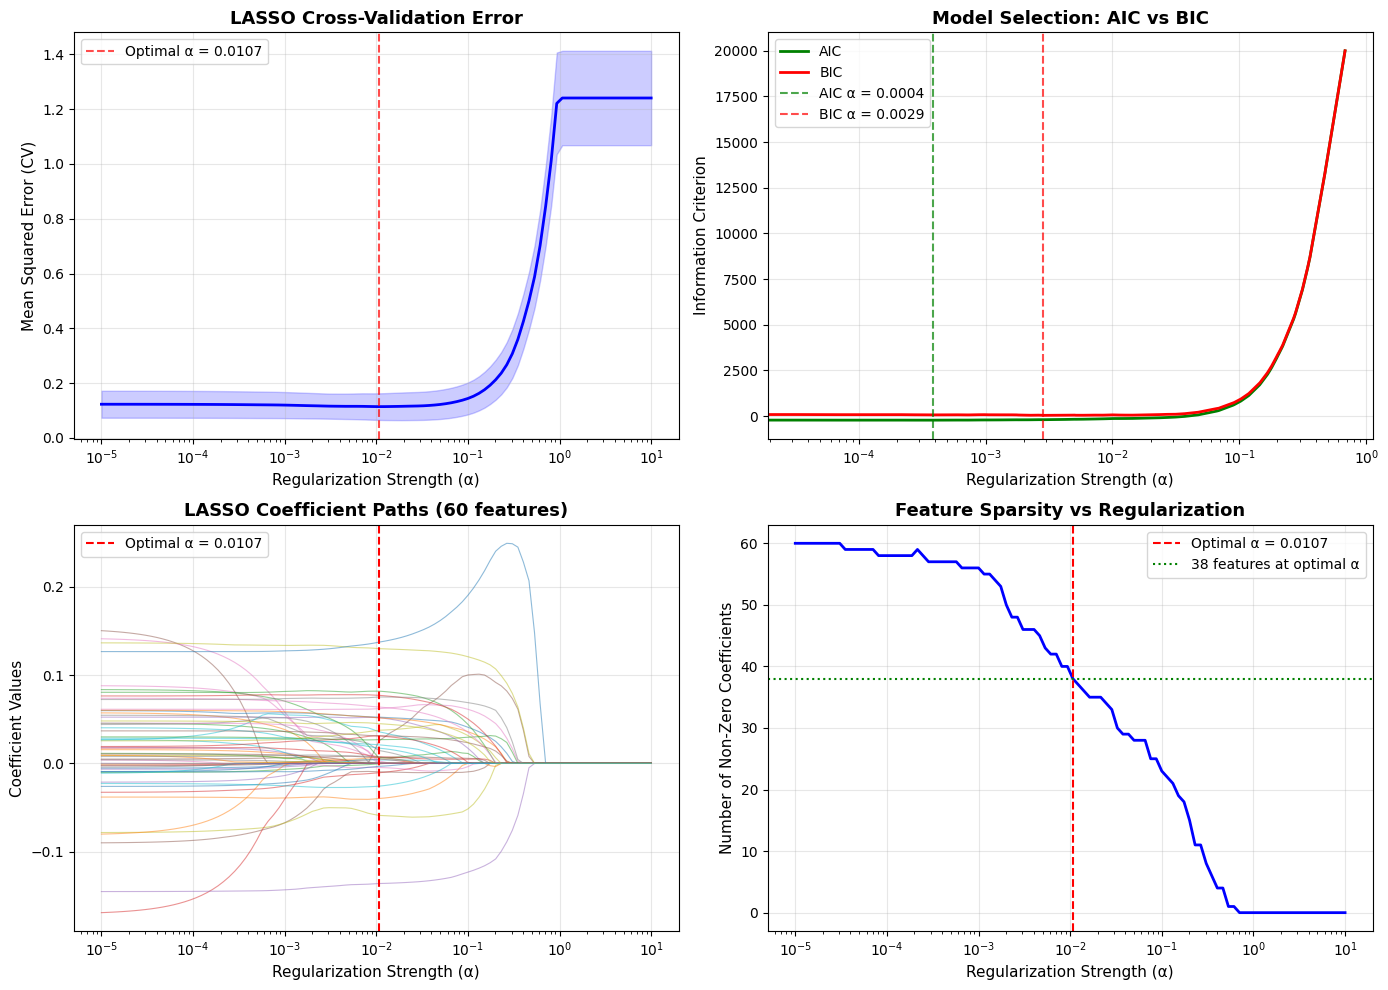

In [93]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].semilogx(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), 'b-', linewidth=2)
axes[0,0].axvline(lasso_cv.alpha_, color='red', linestyle='--', alpha=0.7, 
                  label=f'Optimal α = {lasso_cv.alpha_:.4f}')
axes[0,0].fill_between(lasso_cv.alphas_,
                      lasso_cv.mse_path_.mean(axis=1) - lasso_cv.mse_path_.std(axis=1),
                      lasso_cv.mse_path_.mean(axis=1) + lasso_cv.mse_path_.std(axis=1),
                      alpha=0.2, color='blue')
axes[0,0].set_xlabel('Regularization Strength (α)', fontsize=11)
axes[0,0].set_ylabel('Mean Squared Error (CV)', fontsize=11)
axes[0,0].set_title('LASSO Cross-Validation Error', fontsize=13, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

axes[0,1].plot(lasso_aic.alphas_, lasso_aic.criterion_, 'g-', linewidth=2, label='AIC')
axes[0,1].plot(lasso_bic.alphas_, lasso_bic.criterion_, 'r-', linewidth=2, label='BIC')
axes[0,1].axvline(lasso_aic.alpha_, color='green', linestyle='--', alpha=0.7, 
                  label=f'AIC α = {lasso_aic.alpha_:.4f}')
axes[0,1].axvline(lasso_bic.alpha_, color='red', linestyle='--', alpha=0.7, 
                  label=f'BIC α = {lasso_bic.alpha_:.4f}')
axes[0,1].set_xlabel('Regularization Strength (α)', fontsize=11)
axes[0,1].set_ylabel('Information Criterion', fontsize=11)
axes[0,1].set_title('Model Selection: AIC vs BIC', fontsize=13, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xscale('log')

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(X_train_scaled, y_train, 
                                          alphas=lasso_cv.alphas_, max_iter=10000)

for coef in coefs_lasso:
    axes[1,0].semilogx(alphas_lasso, coef, alpha=0.5, linewidth=0.8)
axes[1,0].axvline(lasso_cv.alpha_, color='red', linestyle='--', 
                  label=f'Optimal α = {lasso_cv.alpha_:.4f}')
axes[1,0].set_xlabel('Regularization Strength (α)', fontsize=11)
axes[1,0].set_ylabel('Coefficient Values', fontsize=11)
axes[1,0].set_title(f'LASSO Coefficient Paths ({len(features)} features)', 
                   fontsize=13, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

n_nonzero = [np.sum(coefs_lasso[:, i] != 0) for i in range(len(alphas_lasso))]
axes[1,1].semilogx(alphas_lasso, n_nonzero, 'b-', linewidth=2)
axes[1,1].axvline(lasso_cv.alpha_, color='red', linestyle='--', 
                  label=f'Optimal α = {lasso_cv.alpha_:.4f}')
axes[1,1].axhline(np.sum(lasso_cv.coef_ != 0), color='green', linestyle=':', 
                  label=f'{np.sum(lasso_cv.coef_ != 0)} features at optimal α')
axes[1,1].set_xlabel('Regularization Strength (α)', fontsize=11)
axes[1,1].set_ylabel('Number of Non-Zero Coefficients', fontsize=11)
axes[1,1].set_title('Feature Sparsity vs Regularization', fontsize=13, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [94]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

final_lasso = lasso_cv
y_train_pred = final_lasso.predict(X_train_scaled)
y_test_pred = final_lasso.predict(X_test_scaled)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\nSelected Model: LASSO (α = {final_lasso.alpha_:.6f})")
print(f"\nPERFORMANCE METRICS:")
print(f"   Training R²:     {train_r2:.4f}")
print(f"   Test R²:         {test_r2:.4f}")
print(f"   Training RMSE:   {train_rmse:.4f}")
print(f"   Test RMSE:       {test_rmse:.4f}")
print(f"   Training MAE:    {train_mae:.4f}")
print(f"   Test MAE:        {test_mae:.4f}")
print(f"\nOVERFITTING CHECK:")
print(f"   R² Gap (Train-Test): {train_r2 - test_r2:.4f}")
print(f"   RMSE Ratio (Test/Train): {test_rmse/train_rmse:.4f}")

cv_scores = cross_val_score(final_lasso, X_train_scaled, y_train, 
                           cv=5, scoring='r2')
print(f"\n🔄 CROSS-VALIDATION STABILITY:")
print(f"   Mean CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")


Selected Model: LASSO (α = 0.010723)

PERFORMANCE METRICS:
   Training R²:     0.9281
   Test R²:         0.8806
   Training RMSE:   0.2385
   Test RMSE:       0.3158
   Training MAE:    0.1755
   Test MAE:        0.1960

OVERFITTING CHECK:
   R² Gap (Train-Test): 0.0475
   RMSE Ratio (Test/Train): 1.3245

🔄 CROSS-VALIDATION STABILITY:
   Mean CV R²: 0.9256 (±0.0108)


In [76]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': final_lasso.coef_,
    'Abs_Coefficient': np.abs(final_lasso.coef_),
    'Non_Zero': final_lasso.coef_ != 0
})

feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print(f"\nFeature Summary:")
print(f"   Total features: {len(features)}")
print(f"   Non-zero coefficients: {np.sum(final_lasso.coef_ != 0)}")
print(f"   Zero coefficients: {np.sum(final_lasso.coef_ == 0)}")
print(f"   Sparsity: {100*np.sum(final_lasso.coef_ == 0)/len(features):.1f}%")

print(f"\nTOP 15 MOST IMPORTANT FEATURES:")
pd.set_option('display.float_format', '{:.6f}'.format)
print(feature_importance.head(15).to_string(index=False))

zero_features = feature_importance[feature_importance['Coefficient'] == 0]
print(f"\n{len(zero_features)} FEATURES SHRUNK TO ZERO:")
if len(zero_features) > 0:
    print(zero_features['Feature'].tolist())
else:
    print("(All features have non-zero coefficients)")


Feature Summary:
   Total features: 60
   Non-zero coefficients: 38
   Zero coefficients: 22
   Sparsity: 36.7%

TOP 15 MOST IMPORTANT FEATURES:
           Feature  Coefficient  Abs_Coefficient  Non_Zero
         naming1st     0.175670         0.175670      True
        figurecopy     0.127877         0.127877      True
    TMTA_tmtAtime1    -0.108508         0.108508      True
    frontaltestB1s     0.079248         0.079248      True
sentrepeatcorrect1     0.075007         0.075007      True
      jlo1stdiades     0.066855         0.066855      True
       vfsem1stobj     0.064999         0.064999      True
   frontaltestA1st     0.064818         0.064818      True
           ll3cor1     0.061791         0.061791      True
                G4    -0.059211         0.059211      True
            MMSE28     0.058088         0.058088      True
         comphr1st     0.056836         0.056836      True
           ll9cor1     0.052055         0.052055      True
              EduC     0.048

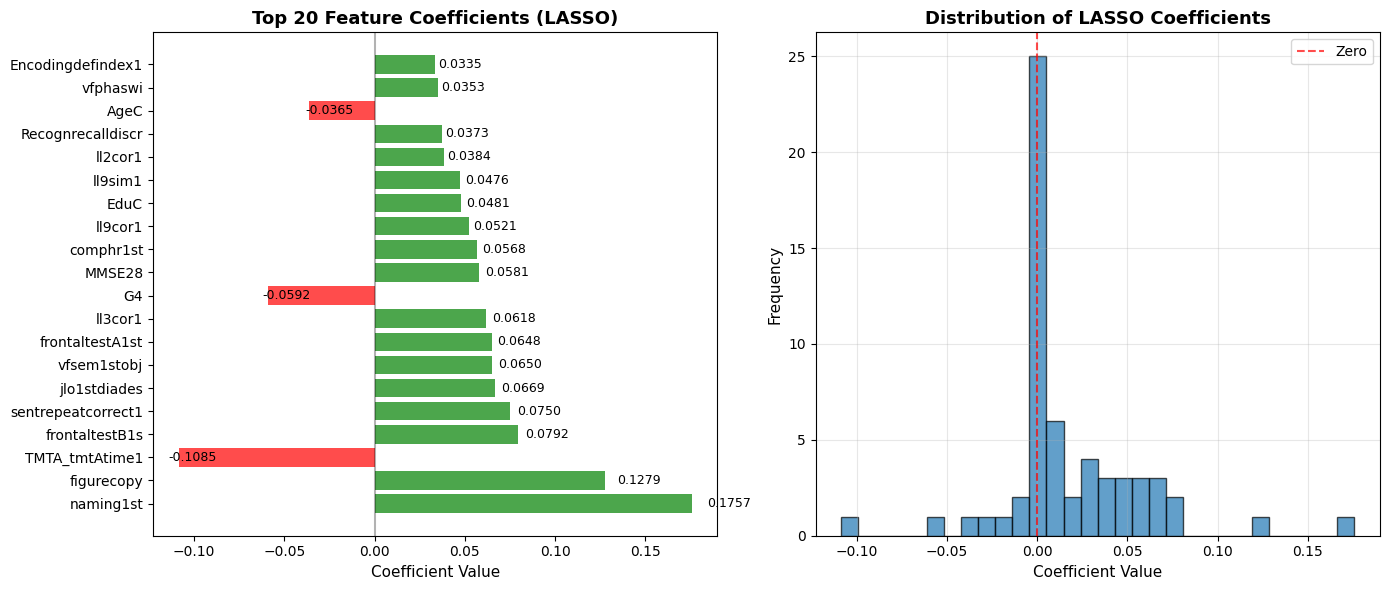

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
top_n = min(20, len(feature_importance))
top_features = feature_importance.head(top_n)

colors = ['red' if coef < 0 else 'green' for coef in top_features['Coefficient']]
axes[0].barh(range(top_n), top_features['Coefficient'], color=colors, alpha=0.7)
axes[0].set_yticks(range(top_n))
axes[0].set_yticklabels(top_features['Feature'])
axes[0].set_xlabel('Coefficient Value', fontsize=11)
axes[0].set_title(f'Top {top_n} Feature Coefficients (LASSO)', fontsize=13, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

for i, (coef, abs_coef) in enumerate(zip(top_features['Coefficient'], top_features['Abs_Coefficient'])):
    axes[0].text(abs_coef * 1.05 if coef >= 0 else -abs_coef * 1.05, 
                i, f'{coef:.4f}', va='center', fontsize=9)

axes[1].hist(feature_importance['Coefficient'], bins=30, alpha=0.7, edgecolor='black')
axes[1].axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Zero')
axes[1].set_xlabel('Coefficient Value', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of LASSO Coefficients', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

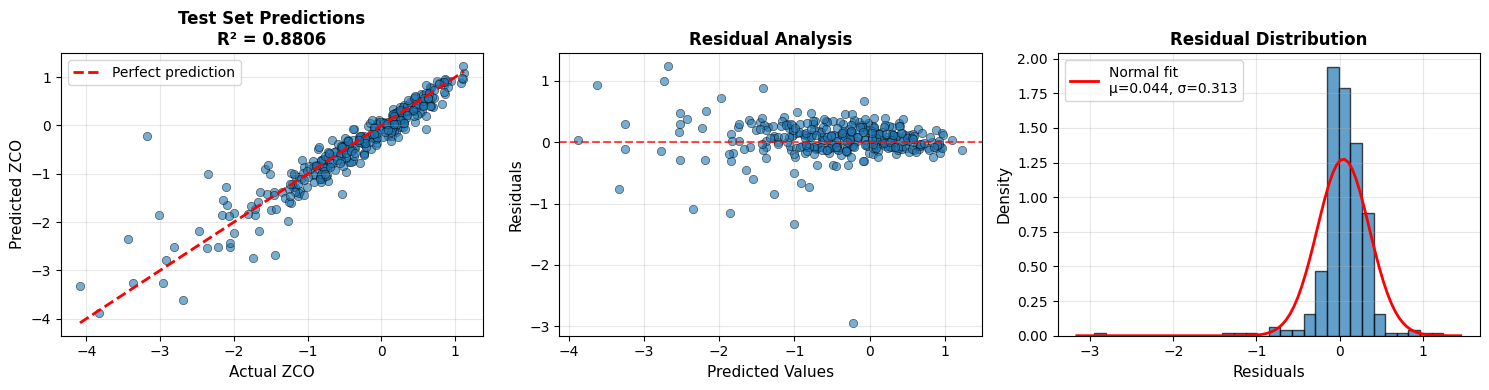

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
            'r--', lw=2, label='Perfect prediction')
axes[0].set_xlabel('Actual ZCO', fontsize=11)
axes[0].set_ylabel('Predicted ZCO', fontsize=11)
axes[0].set_title(f'Test Set Predictions\nR² = {test_r2:.4f}', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, residuals, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.7)
axes[1].set_xlabel('Predicted Values', fontsize=11)
axes[1].set_ylabel('Residuals', fontsize=11)
axes[1].set_title('Residual Analysis', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

axes[2].hist(residuals, bins=30, alpha=0.7, edgecolor='black', density=True)
from scipy.stats import norm
mu, std = norm.fit(residuals)
xmin, xmax = axes[2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[2].plot(x, p, 'r', linewidth=2, label=f'Normal fit\nμ={mu:.3f}, σ={std:.3f}')
axes[2].set_xlabel('Residuals', fontsize=11)
axes[2].set_ylabel('Density', fontsize=11)
axes[2].set_title('Residual Distribution', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [79]:
n_bootstrap = 100
bootstrap_coefs = np.zeros((n_bootstrap, len(features)))

for i in range(n_bootstrap):
    # Bootstrap sample
    indices = np.random.choice(range(len(X_train_scaled)), size=len(X_train_scaled), replace=True)
    X_boot = X_train_scaled[indices]
    y_boot = y_train.values[indices]
    
    # Fit LASSO with same alpha
    lasso_boot = Lasso(alpha=final_lasso.alpha_, max_iter=10000)
    lasso_boot.fit(X_boot, y_boot)
    bootstrap_coefs[i] = lasso_boot.coef_

coef_means = bootstrap_coefs.mean(axis=0)
coef_stds = bootstrap_coefs.std(axis=0)
coef_stability = np.abs(coef_means / (coef_stds + 1e-10)) 

stability_df = pd.DataFrame({
    'Feature': features,
    'Mean_Coefficient': coef_means,
    'Std_Coefficient': coef_stds,
    'Stability_Ratio': coef_stability
}).sort_values('Stability_Ratio', ascending=False)

print("\n📊 Most Stable Coefficients (High Signal-to-Noise):")
print(stability_df.head(10).to_string(index=False))

print("\n⚠️  Least Stable Coefficients (High Variance):")
print(stability_df.tail(10).to_string(index=False))


📊 Most Stable Coefficients (High Signal-to-Noise):
           Feature  Mean_Coefficient  Std_Coefficient  Stability_Ratio
         naming1st          0.131442         0.012165        10.805127
    TMTA_tmtAtime1         -0.136908         0.016571         8.262108
        figurecopy          0.131256         0.017866         7.346621
       vfsem1stobj          0.060232         0.009665         6.231751
    frontaltestB1s          0.073579         0.011889         6.188826
              EduC          0.046675         0.008335         5.599877
sentrepeatcorrect1          0.072683         0.013835         5.253527
      jlo1stdiades          0.075262         0.016839         4.469543
         comphr1st          0.050992         0.012850         3.968242
   frontaltestA1st          0.061381         0.016444         3.732679

⚠️  Least Stable Coefficients (High Variance):
 Feature  Mean_Coefficient  Std_Coefficient  Stability_Ratio
 ll2sim1          0.000400         0.001850         0.2159

In [80]:
print(f"\n1. MODEL PERFORMANCE:")
print(f"   • Test R²: {test_r2:.4f} {'(Suspiciously high!)' if test_r2 > 0.9 else '(Good)' if test_r2 > 0.7 else '(Moderate)' if test_r2 > 0.5 else '(Low)'}")
print(f"   • Overfitting gap: {train_r2 - test_r2:.4f} {'(High risk!)' if (train_r2 - test_r2) > 0.2 else '(Acceptable)' if (train_r2 - test_r2) > 0.1 else '(Good)'}")

print(f"\n2. FEATURE INSIGHTS:")
print(f"   • {np.sum(final_lasso.coef_ != 0)}/{len(features)} features retained")
print(f"   • Top feature: {feature_importance.iloc[0]['Feature']} (coef = {feature_importance.iloc[0]['Coefficient']:.4f})")


1. MODEL PERFORMANCE:
   • Test R²: 0.8863 (Good)
   • Overfitting gap: 0.0486 (Good)

2. FEATURE INSIGHTS:
   • 38/60 features retained
   • Top feature: naming1st (coef = 0.1757)


In [98]:
# Define subgroups
healthy_mask = (y_test >= -1)  # ZCO ≥ -1
dementia_mask = (y_test < -1)   # ZCO < -1

# Calculate separate R²
r2_healthy = r2_score(y_test[healthy_mask], y_test_pred[healthy_mask])
r2_dementia = r2_score(y_test[dementia_mask], y_test_pred[dementia_mask])

print(f"R² for healthy (ZCO ≥ -1): {r2_healthy:.3f}")
print(f"R² for dementia (ZCO < -1): {r2_dementia:.3f}")
print(f"Performance gap: {r2_healthy - r2_dementia:.3f}")

R² for healthy (ZCO ≥ -1): 0.867
R² for dementia (ZCO < -1): 0.381
Performance gap: 0.486


In [67]:
mae_healthy = mean_absolute_error(y_test[healthy_mask], y_test_pred[healthy_mask])
mae_dementia = mean_absolute_error(y_test[dementia_mask], y_test_pred[dementia_mask])

print(f"\nMAE for healthy: {mae_healthy:.3f} ZCO points")
print(f"MAE for dementia: {mae_dementia:.3f} ZCO points")
print(f"Ratio (dementia/healthy): {mae_dementia/mae_healthy:.2f}x worse")


MAE for healthy: 0.102 ZCO points
MAE for dementia: 0.356 ZCO points
Ratio (dementia/healthy): 3.49x worse


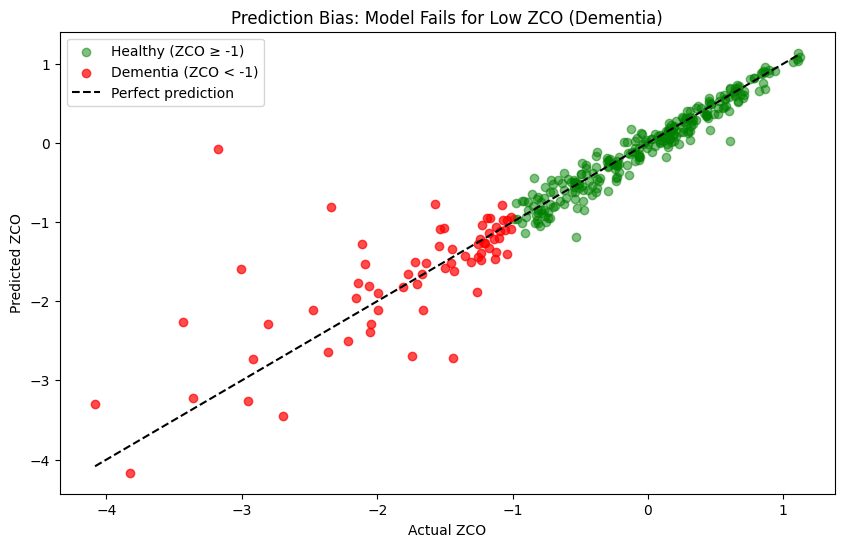

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test[healthy_mask], y_test_pred[healthy_mask], 
            alpha=0.5, label='Healthy (ZCO ≥ -1)', color='green')
plt.scatter(y_test[dementia_mask], y_test_pred[dementia_mask], 
            alpha=0.7, label='Dementia (ZCO < -1)', color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'k--', label='Perfect prediction')
plt.xlabel('Actual ZCO')
plt.ylabel('Predicted ZCO')
plt.title('Prediction Bias: Model Fails for Low ZCO (Dementia)')
plt.legend()
plt.show()

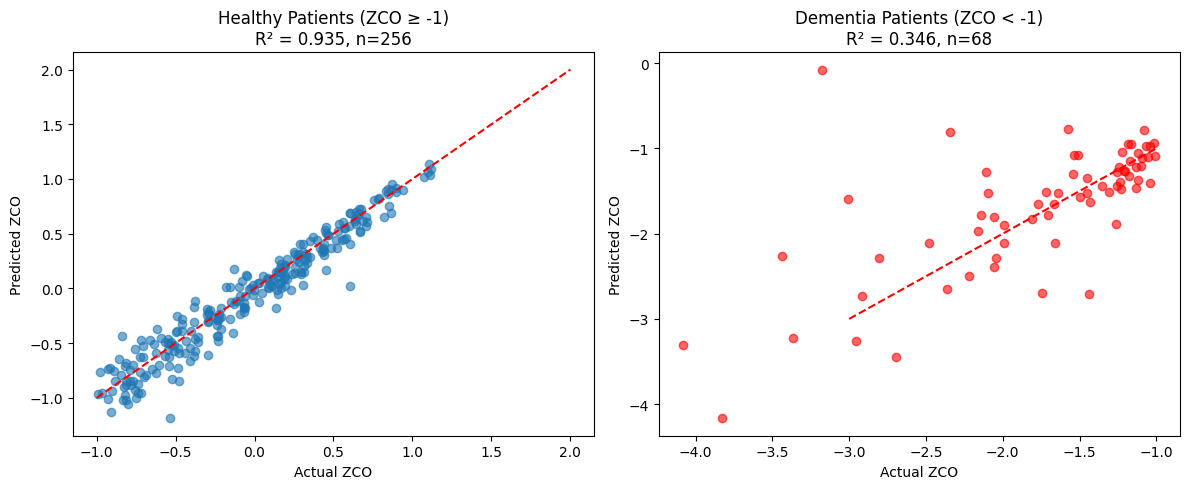

In [69]:
# Create a clear visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Healthy patients
axes[0].scatter(y_test[healthy_mask], y_test_pred[healthy_mask], alpha=0.6)
axes[0].plot([-1, 2], [-1, 2], 'r--')
axes[0].set_title(f'Healthy Patients (ZCO ≥ -1)\nR² = {r2_healthy:.3f}, n={sum(healthy_mask)}')
axes[0].set_xlabel('Actual ZCO')
axes[0].set_ylabel('Predicted ZCO')

# Right: Dementia patients  
axes[1].scatter(y_test[dementia_mask], y_test_pred[dementia_mask], alpha=0.6, color='red')
axes[1].plot([-3, -1], [-3, -1], 'r--')
axes[1].set_title(f'Dementia Patients (ZCO < -1)\nR² = {r2_dementia:.3f}, n={sum(dementia_mask)}')
axes[1].set_xlabel('Actual ZCO')
axes[1].set_ylabel('Predicted ZCO')

plt.tight_layout()
plt.savefig('subgroup_performance.png', dpi=300, bbox_inches='tight')
plt.show()